<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_17/PCW_Session_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trading options and gaining or losing money

You start with ¥ 10,000 and can buy as many of the following call options as you want.

* Cost of 1 call option: ¥ 100
* Strike price: ¥ 10,500
* According to your pricing model, the underlying stock will have a price at the option expiry date distributed according to Normal(¥ 10,500, (¥ 300)²). So, the strike price and the expected value of the stock price are the same.

Work through the tasks below to determine a good trading strategy for maximizing your gains and limiting your losses while trading these options.

## Getting started

Run the code cell below and understand how the output is computed. The output shows the (random) result of buying one call option and waiting until the option expiry date.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_money_at_option_expiry(
    money_at_start, options_purchased, price_per_option=100,
    strike_price=10500, expiry_price_mean=10500, expiry_price_stdev=300):

    '''
    Calculate how much money you have after buying some number of call
    options with a strike price of `strike_price`, and waiting for them to
    expire. The value of the underlying stock at expiry is a sample from a
    normal distribution with mean `expiry_mean_price` and standard
    deviation `expiry_price_stdev`.

    Arguments:

        money_at_start (float) How much money you have before buying the
          options.

        options_purchased (int) How many options you purchase.

        price_per_option (float) The price of 1 option.

        strike_price (float) The strike price of the option.

        expiry_price_mean (float) The mean of the normal distribution of
          the stock price at expiry.

        expiry_price_stdev (float) The standard deviation of the normal
          distribution of the stock price at expiry.

    All arguments can also be NumPy arrays instead of scalars.

    Returns: (float or array) the amount of money you have left after the
      options expired, based on the random sample(s) from the final stock
      price distribution.
    '''
    stock_price = np.random.normal(
        expiry_price_mean, expiry_price_stdev,
        size=np.shape(money_at_start))
    option_value_at_expiry = np.maximum(0, stock_price - strike_price)
    money_at_end = (
        money_at_start
        - options_purchased * price_per_option
        + options_purchased * option_value_at_expiry)
    return money_at_end

In [2]:
# Buy 1 option and see what happens. You can run this cell a few times to
# see different random outcomes.

money_at_start = 10000
price_per_option = 100
options = 1

money_at_end = calculate_money_at_option_expiry(
    money_at_start, options, price_per_option)

print(f'We started with ¥ {money_at_start:.2f}')
print(f'We bought {options} option(s)')
print(f'We ended up with ¥ {money_at_end:.2f}')

We started with ¥ 10000.00
We bought 1 option(s)
We ended up with ¥ 9900.00


## Task 1

Use the function above to simulate buying 1 option 100,000 times and
plot a histogram of the results using 100 histogram bins. This histogram
will show the distribution over how much money you might have left
when starting with ¥ 10,000 and buying 1 option. Also, use your results
to compute the average, 25th, 50th, and 75th percentiles, and risk of
loss for this trade. (The risk of ruin is 0 since it's impossible to lose
all your money when buying only 1 option.)

1. Plot a histogram.
2. Compute the average amount of money you end up with and plot it on the histogram.
3. Compute the 25th, 50th, and 75th percentiles and plot them on the histogram.
4. Compute the risk of loss.

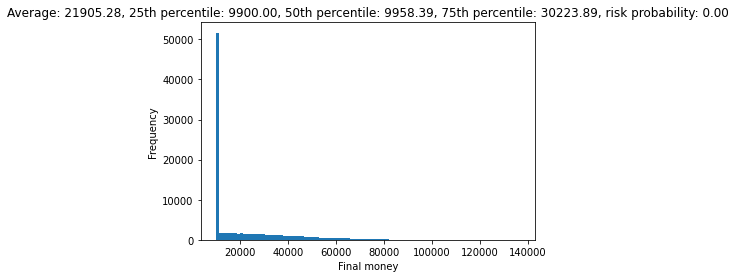

In [16]:
# Run the simple simulation above 100,000 times and record results
import numpy as np 
repeats = 100000
def run_simulation(repeats, func, *args, **kwargs):
    results = []
    for _ in range(repeats):
        money_at_end = func(*args, **kwargs)
        results.append(money_at_end)
    return results

results = run_simulation(repeats, calculate_money_at_option_expiry, money_at_start, price_per_option, options)
# Plot a histogram of the results and print out the metrics


def plot_results(results):
    plt.hist(results, bins = 100)
    plt.xlabel("Final money")
    plt.ylabel("Frequency")
    average = np.mean(results)
    percentile_25 = np.percentile(results, 25)
    percentile_50 = np.percentile(results, 50)
    percentile_75 = np.percentile(results, 75)
    risks = sum([x <= 0 for x in results])/ len(results)
    plt.title(f"Average: {average:.2f}, 25th percentile: {percentile_25:.2f}, 50th percentile: {percentile_50:.2f}, 75th percentile: {percentile_75:.2f}, risk probability: {risks:.2f}")

plot_results(results)

## Task 2

You now get to play the game of risking some money on buying options repeatedly. To start with, assume you buy 1 option (as in Task 1) but you do it 20 times in sequence.

1. Buy 1 option and let it expire. You will now have a little more or less money than you started with.
2. Buy another option and let it expire.
3. You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.

Reuse and update your code from Task 1 to simulate this scenario. Plot the resulting histogram and compute the same metrics as in Task 1.

### Questions

1. Are we making money or losing money, on average?
2. What is the minimum amount of money we can end up with? Explain why.

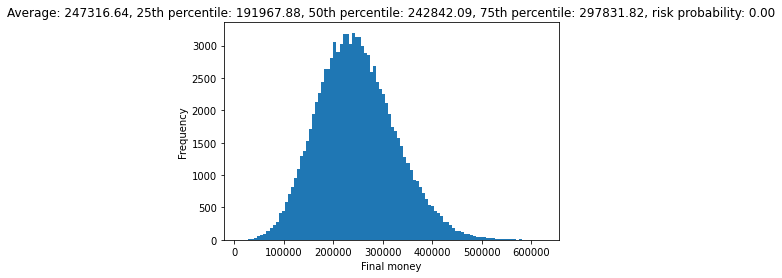

In [12]:
# Compute the money left after 20 trades of 1 option for 100,000 trials
def risk_20_times(money_at_start, price_per_option, options):
    money_at_end = money_at_start

    for _ in range(20):
        if money_at_end < price_per_option:
            money_at_end = 0
            break
        
        money_at_end = calculate_money_at_option_expiry(money_at_end, price_per_option, options)

    return money_at_end

results = run_simulation(repeats, risk_20_times, money_at_start, price_per_option, options)

# Plot a histogram of the results and print out the metrics
plot_results(results)


1. We are making money on average (average return = ¥247316).
2. The minimum amount of money we can end up with is ¥10000 - 20 * ¥100 = ¥8000.


## Task 3

Modify the code in Task 2 such that, rather than buying only 1 option in each of the 20 trades, you risk 30% of your money on every trade. So, for example, if you have ¥ 5,000 left, you would risk ¥ 1,500 and buy 15 options at ¥ 100 per option. You should round the number of options to the nearest integer.

1. Use 30% of your remaining money to buy options let them expire. You will now have more or less money than you started with.
3. You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.

Reuse and update your code from Task 2 to simulate this scenario. Plot the resulting histogram and compute the same metrics as in Task 1. You should now add the _risk of ruin_ metric since you might run out of money.

### Questions

1. Are we making money or losing money, on average?
2. Should we risk more or less than 30% of our money on each trade?

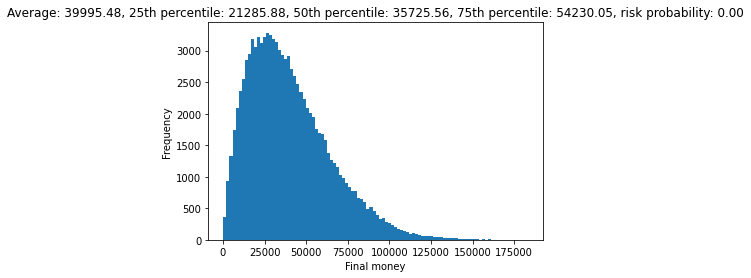

In [13]:
# Compute the money left after 20 trades with 30% risked per trade for
# 100,000 trials
def risk_30_percent(money_at_start, price_per_option):
    money_at_end = money_at_start

    for _ in range(20):
        if money_at_end < price_per_option:
            money_at_end = 0
            break
        
        options = (money_at_end * 0.3)// price_per_option
        money_at_end = calculate_money_at_option_expiry(money_at_end, price_per_option, options)

    return money_at_end

results = run_simulation(repeats, risk_30_percent, money_at_start, price_per_option)

# Plot a histogram of the results and print out the metrics
plot_results(results)




A bit weird that my risk of ruin is still 0. My guess is that because we would not be able to buy any options if our balance is 100/0.3 = \$333, so it never got to below $100 to be counted as being bankrupted?

We are definitely making money on average though.

## Task 4 (optional)

Determine the optimal fraction of your money to risk on each trade. It's not 30%. Which metric(s) should you use for this optimization?